In [4]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Métodos estadísticos
# -----------------------------------------------------------------------
from scipy.stats import zscore # para calcular el z-score
from sklearn.neighbors import LocalOutlierFactor # para detectar outliers usando el método LOF
from sklearn.ensemble import IsolationForest # para detectar outliers usando el metodo IF
from sklearn.neighbors import NearestNeighbors # para calcular la epsilon
from sklearn.impute import KNNImputer
# Para generar combinaciones de listas
# -----------------------------------------------------------------------
from itertools import product , combinations
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Gestionar warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("../../../")
from src.SupportOutliers import (
    plot_outliers_univariados,
    identificar_outliers_iqr,
    identificar_outliers_z,
    visualizar_outliers_bivariados,
    explorar_outliers_if,
    explorar_outliers_lof
)

In [5]:
df = pd.read_pickle("../../../datos/02_regresiones/cluster_1/04_datos_robust_scaler.pkl")

# Identificación de outliers

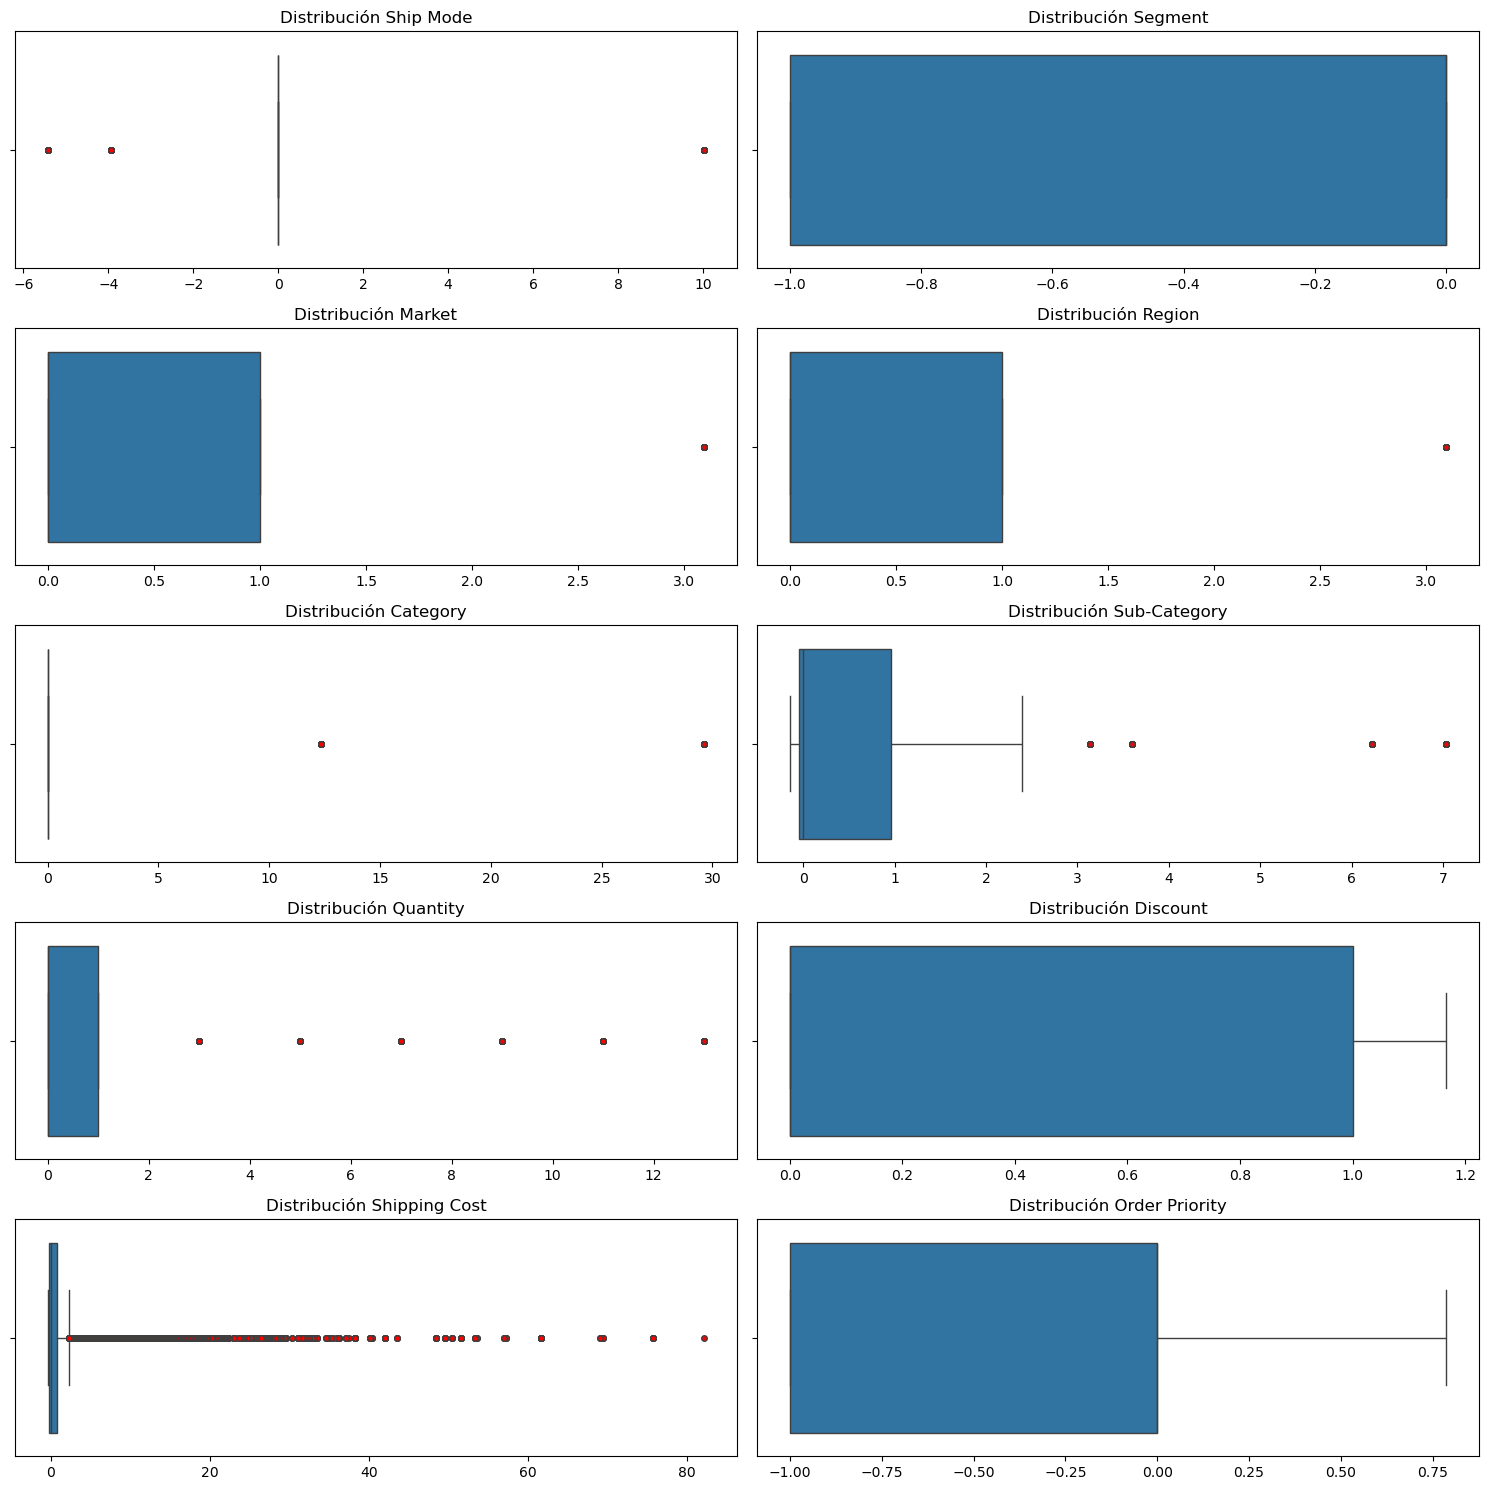

In [6]:
cols_visualizar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority']
plot_outliers_univariados(df[cols_visualizar],"b",20,(15,15))

# Histplot

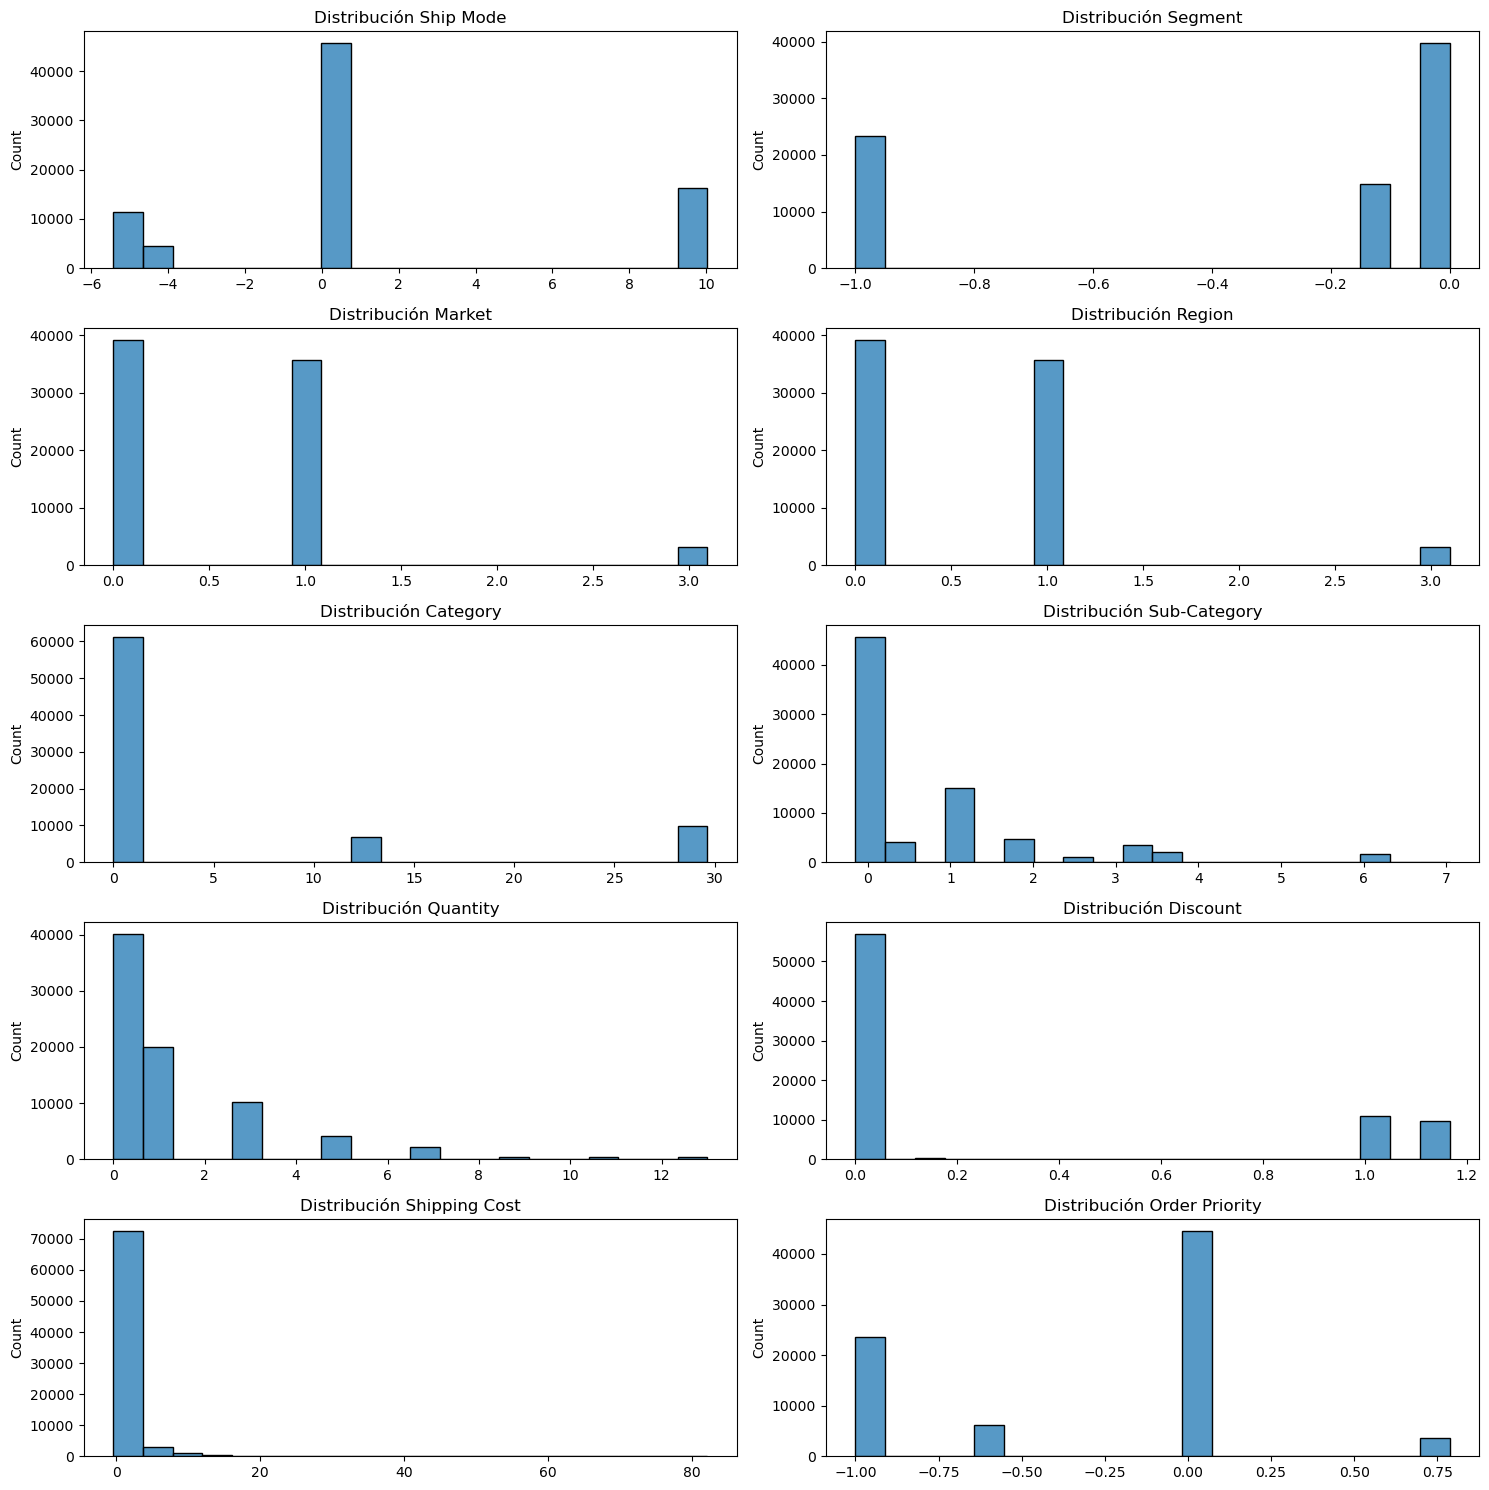

In [7]:
cols_visualizar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority']
plot_outliers_univariados(df[cols_visualizar],"h",20,(15,15))

# Outliers Multivariados

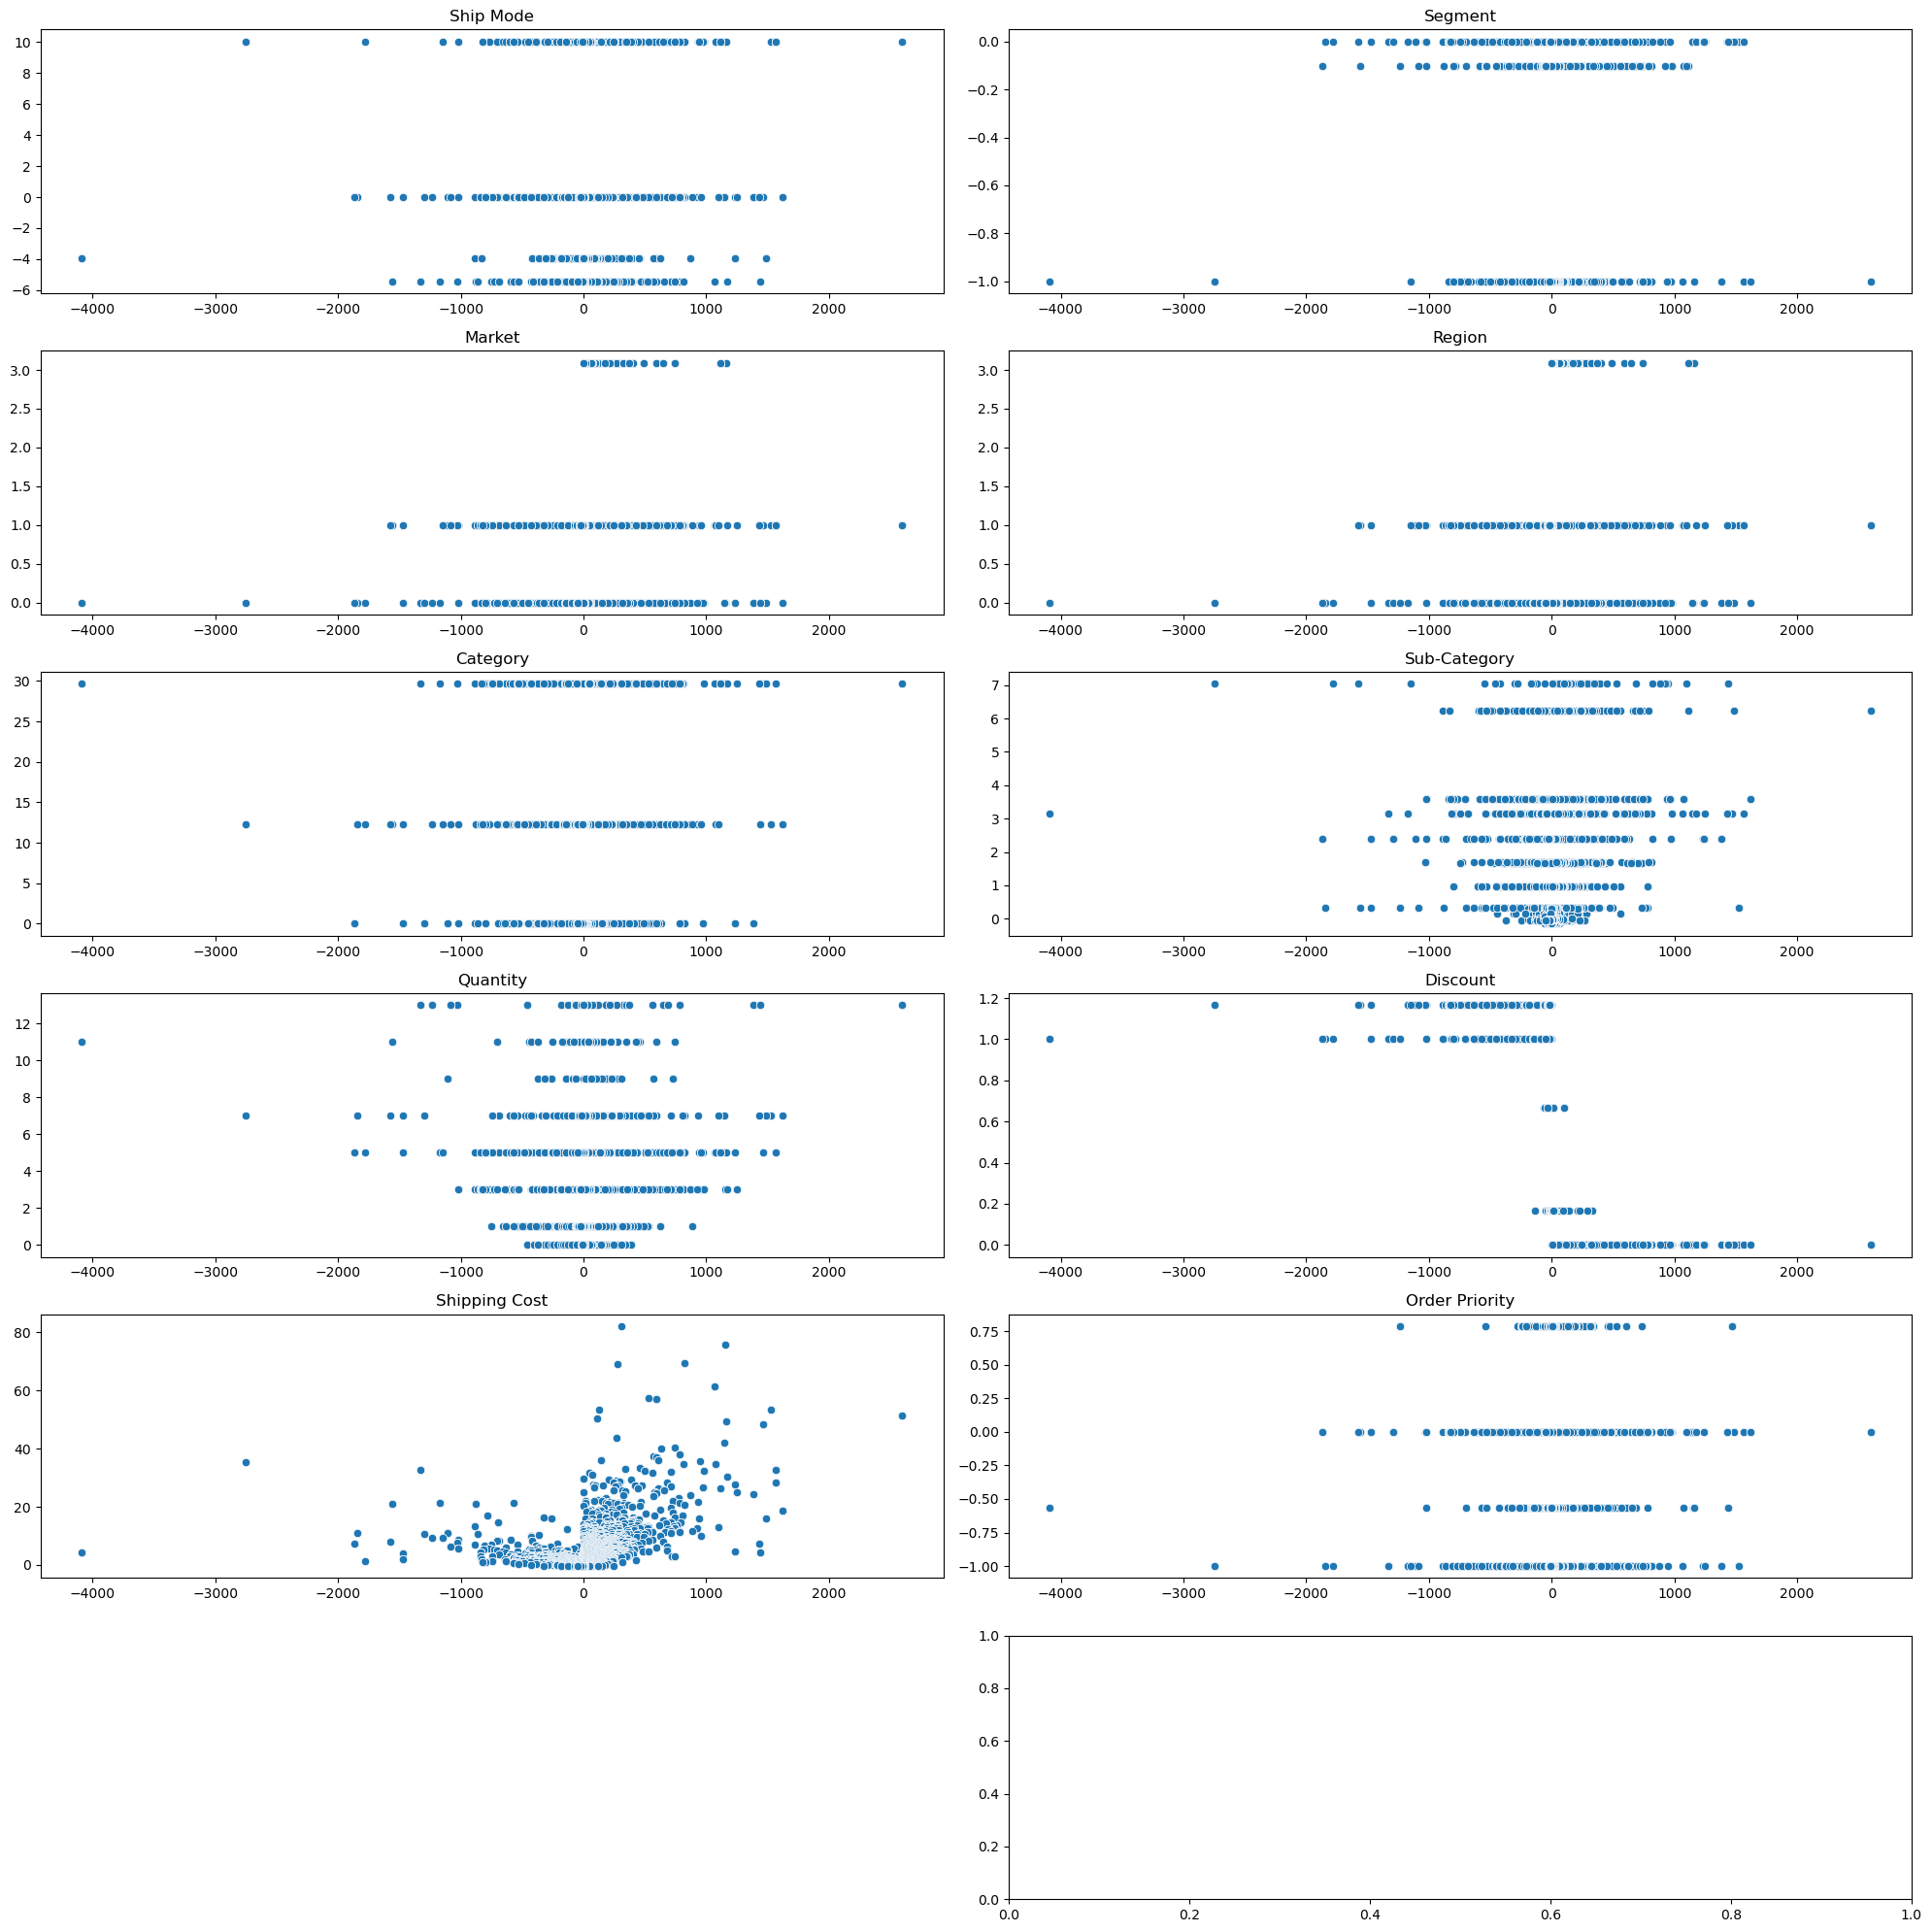

In [8]:
cols_visualizar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority', 'Profit']
visualizar_outliers_bivariados(df[cols_visualizar],"Profit",(20,20))

# Análisis IQR de Outliers

In [9]:
cols_visualizar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority']
dictio_iqr = identificar_outliers_iqr(df[cols_visualizar])

La columna SHIP MODE tiene 32273 outliers entre el total de 78066 datos, es decir un 41.34066046678452%
La columna SEGMENT tiene 0 outliers entre el total de 78066 datos, es decir un 0.0%
La columna MARKET tiene 3183 outliers entre el total de 78066 datos, es decir un 4.077319191453386%
La columna REGION tiene 3183 outliers entre el total de 78066 datos, es decir un 4.077319191453386%
La columna CATEGORY tiene 16743 outliers entre el total de 78066 datos, es decir un 21.44723695334717%
La columna SUB-CATEGORY tiene 7443 outliers entre el total de 78066 datos, es decir un 9.534240258243026%
La columna QUANTITY tiene 17836 outliers entre el total de 78066 datos, es decir un 22.847334306868547%
La columna DISCOUNT tiene 0 outliers entre el total de 78066 datos, es decir un 0.0%
La columna SHIPPING COST tiene 8918 outliers entre el total de 78066 datos, es decir un 11.423667153434273%
La columna ORDER PRIORITY tiene 0 outliers entre el total de 78066 datos, es decir un 0.0%


In [10]:
df.isnull().sum()

Ship Mode         0
Segment           0
Market            0
Region            0
Category          0
Sub-Category      0
Quantity          0
Discount          0
Shipping Cost     0
Order Priority    0
Profit            0
dtype: int64

# Isolation Forest
Para la detección de Outliers

se ha hecho outlier_0.01_Order Priority_isoforest
se ha hecho outlier_0.05_Order Priority_isoforest
se ha hecho outlier_0.1_Order Priority_isoforest
Se devuelve df Modificado


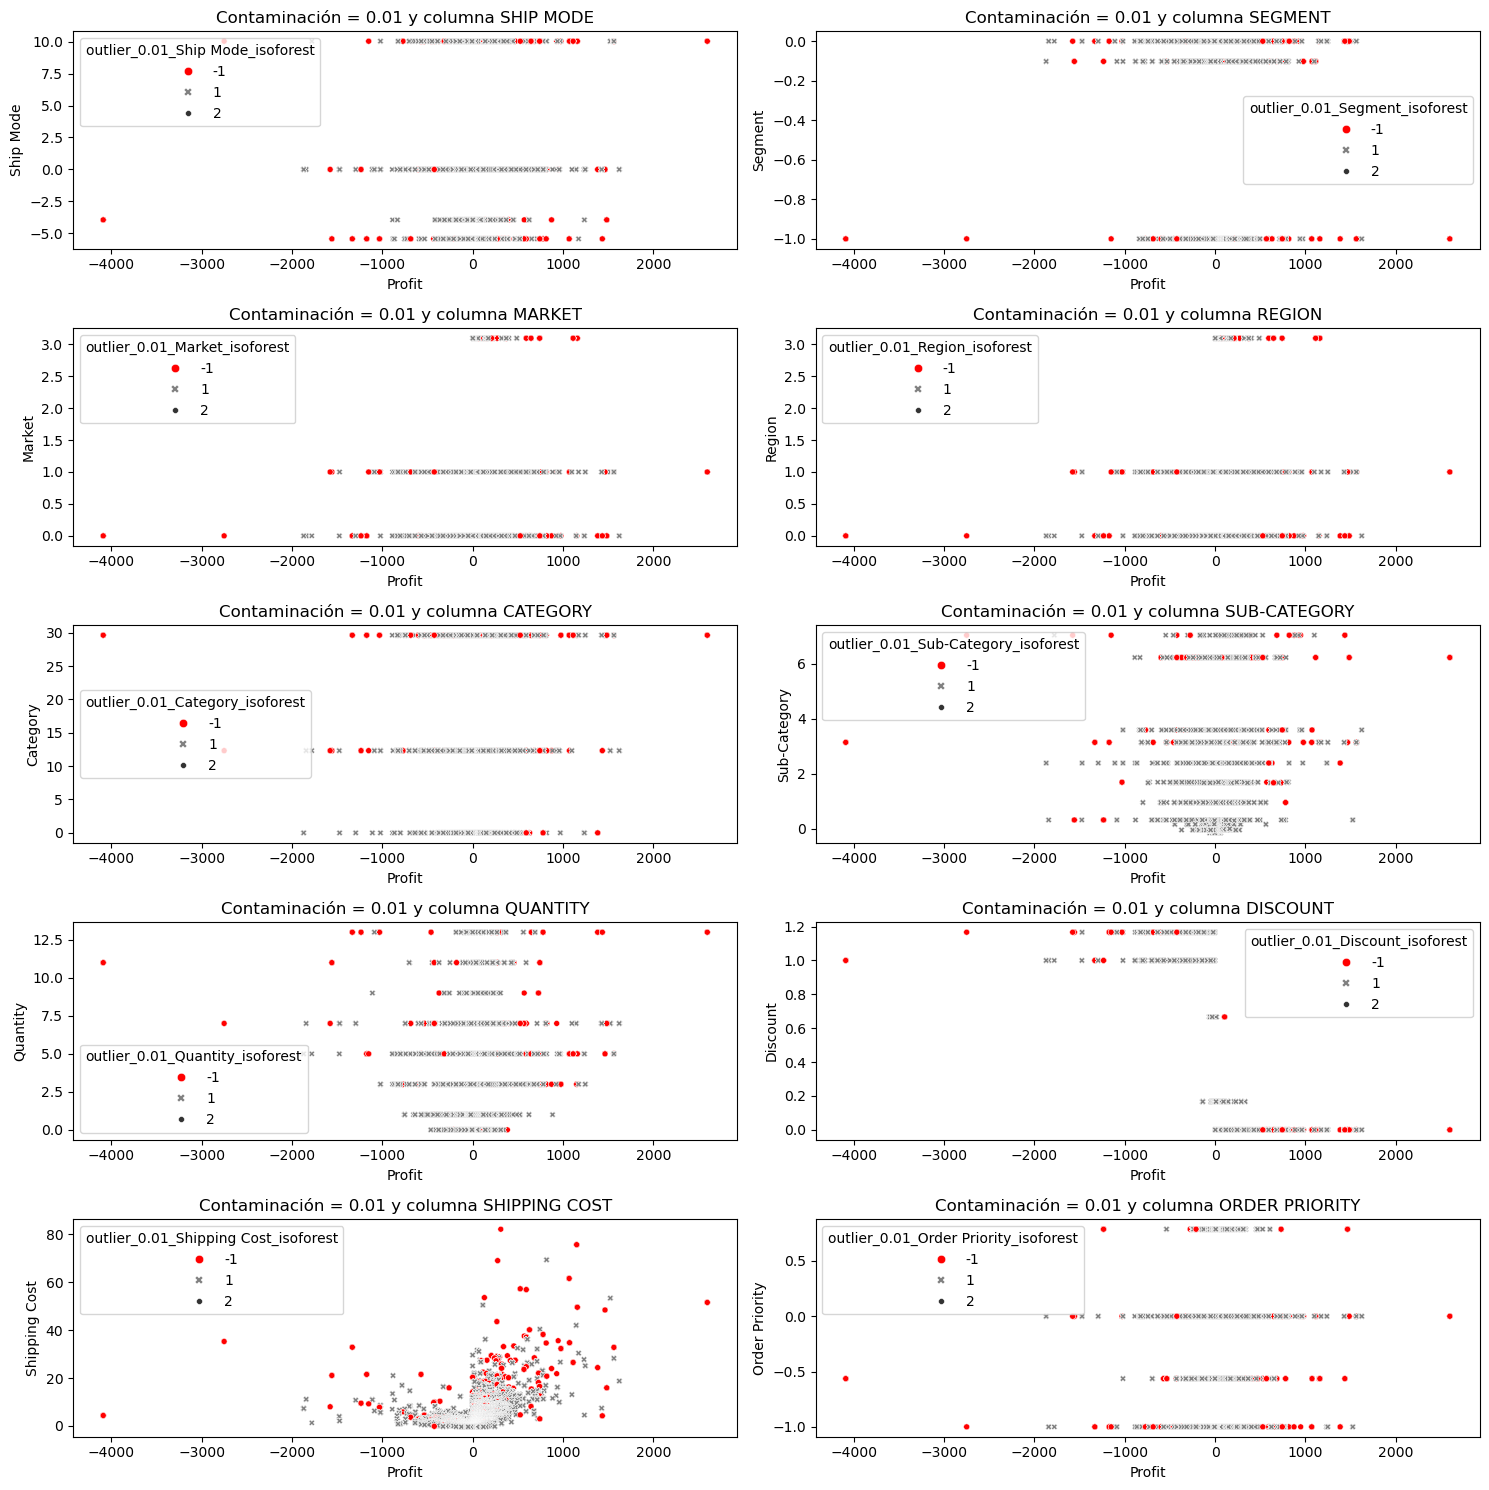

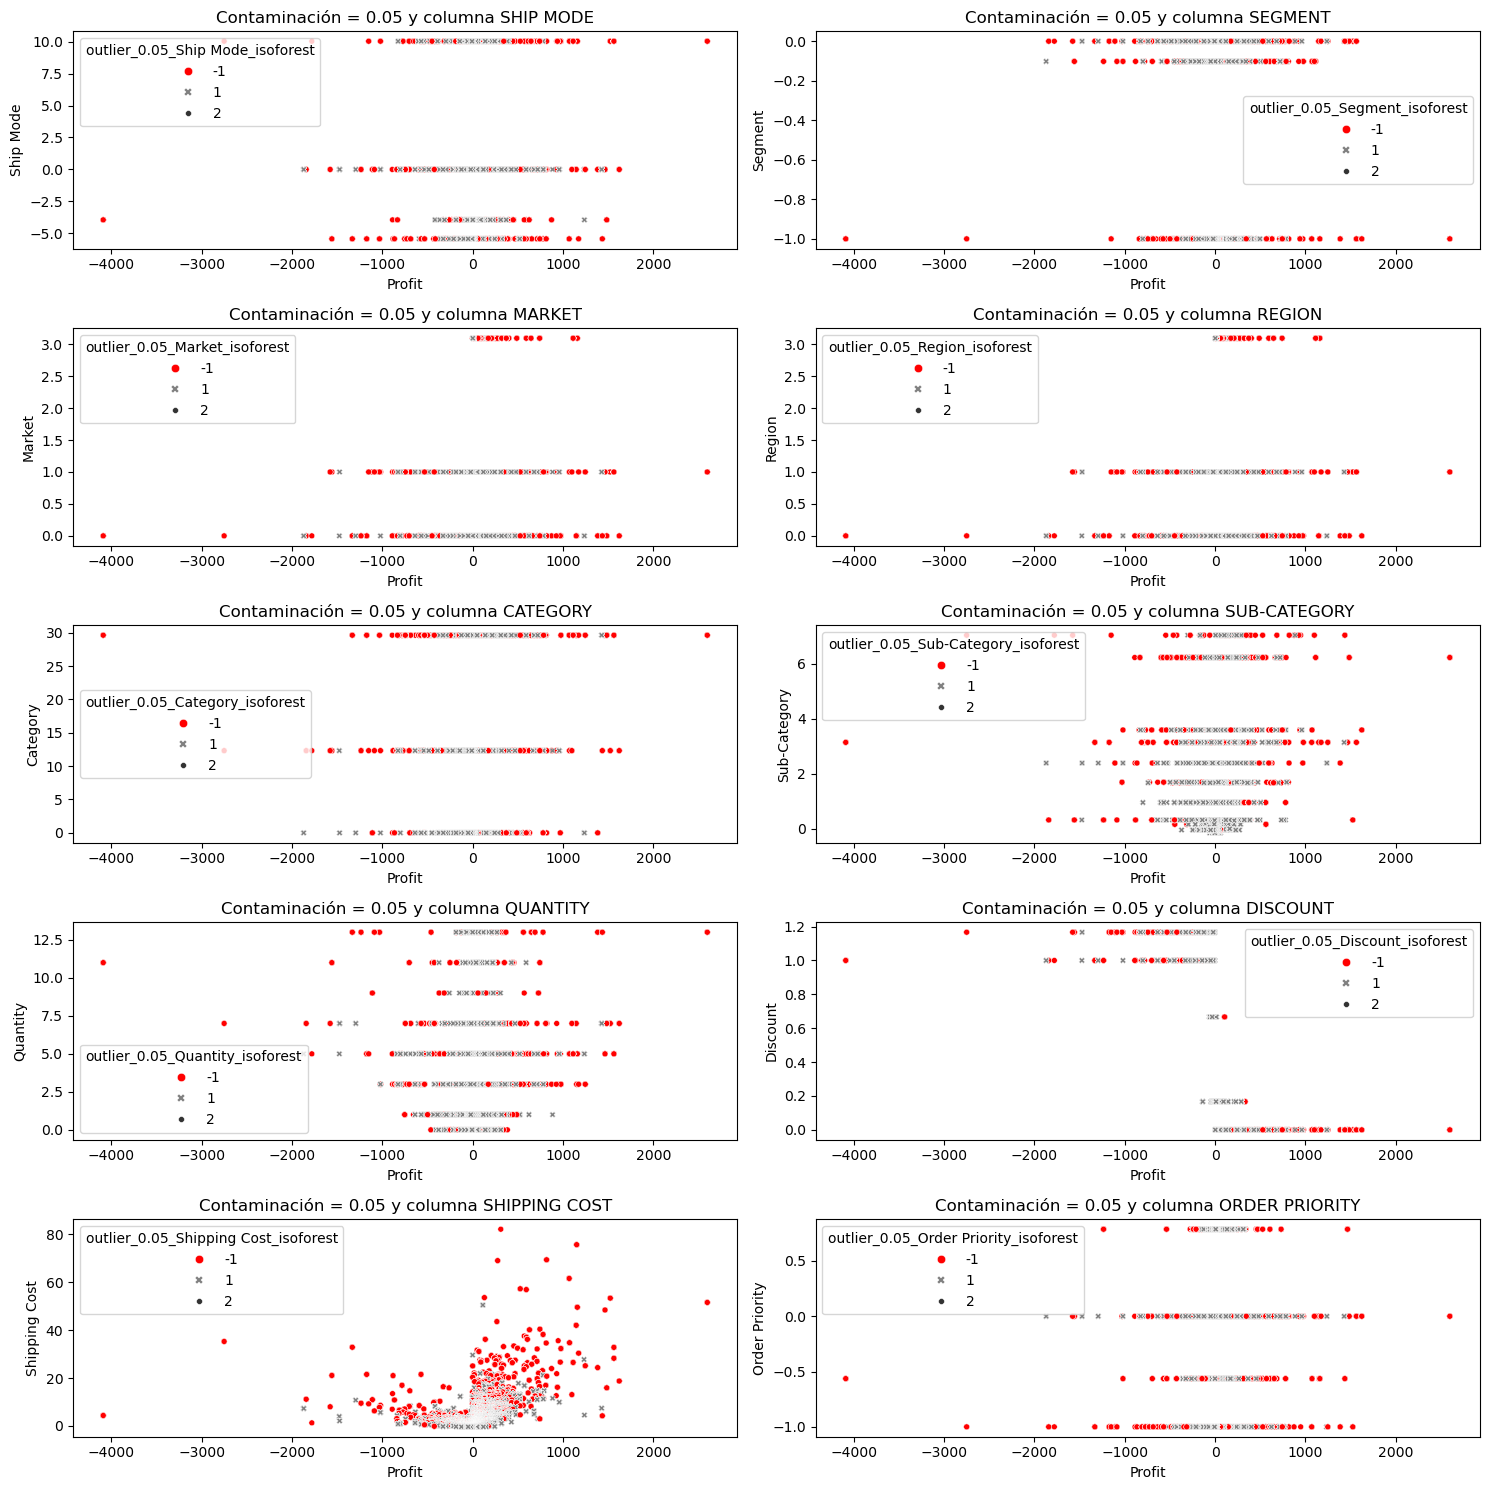

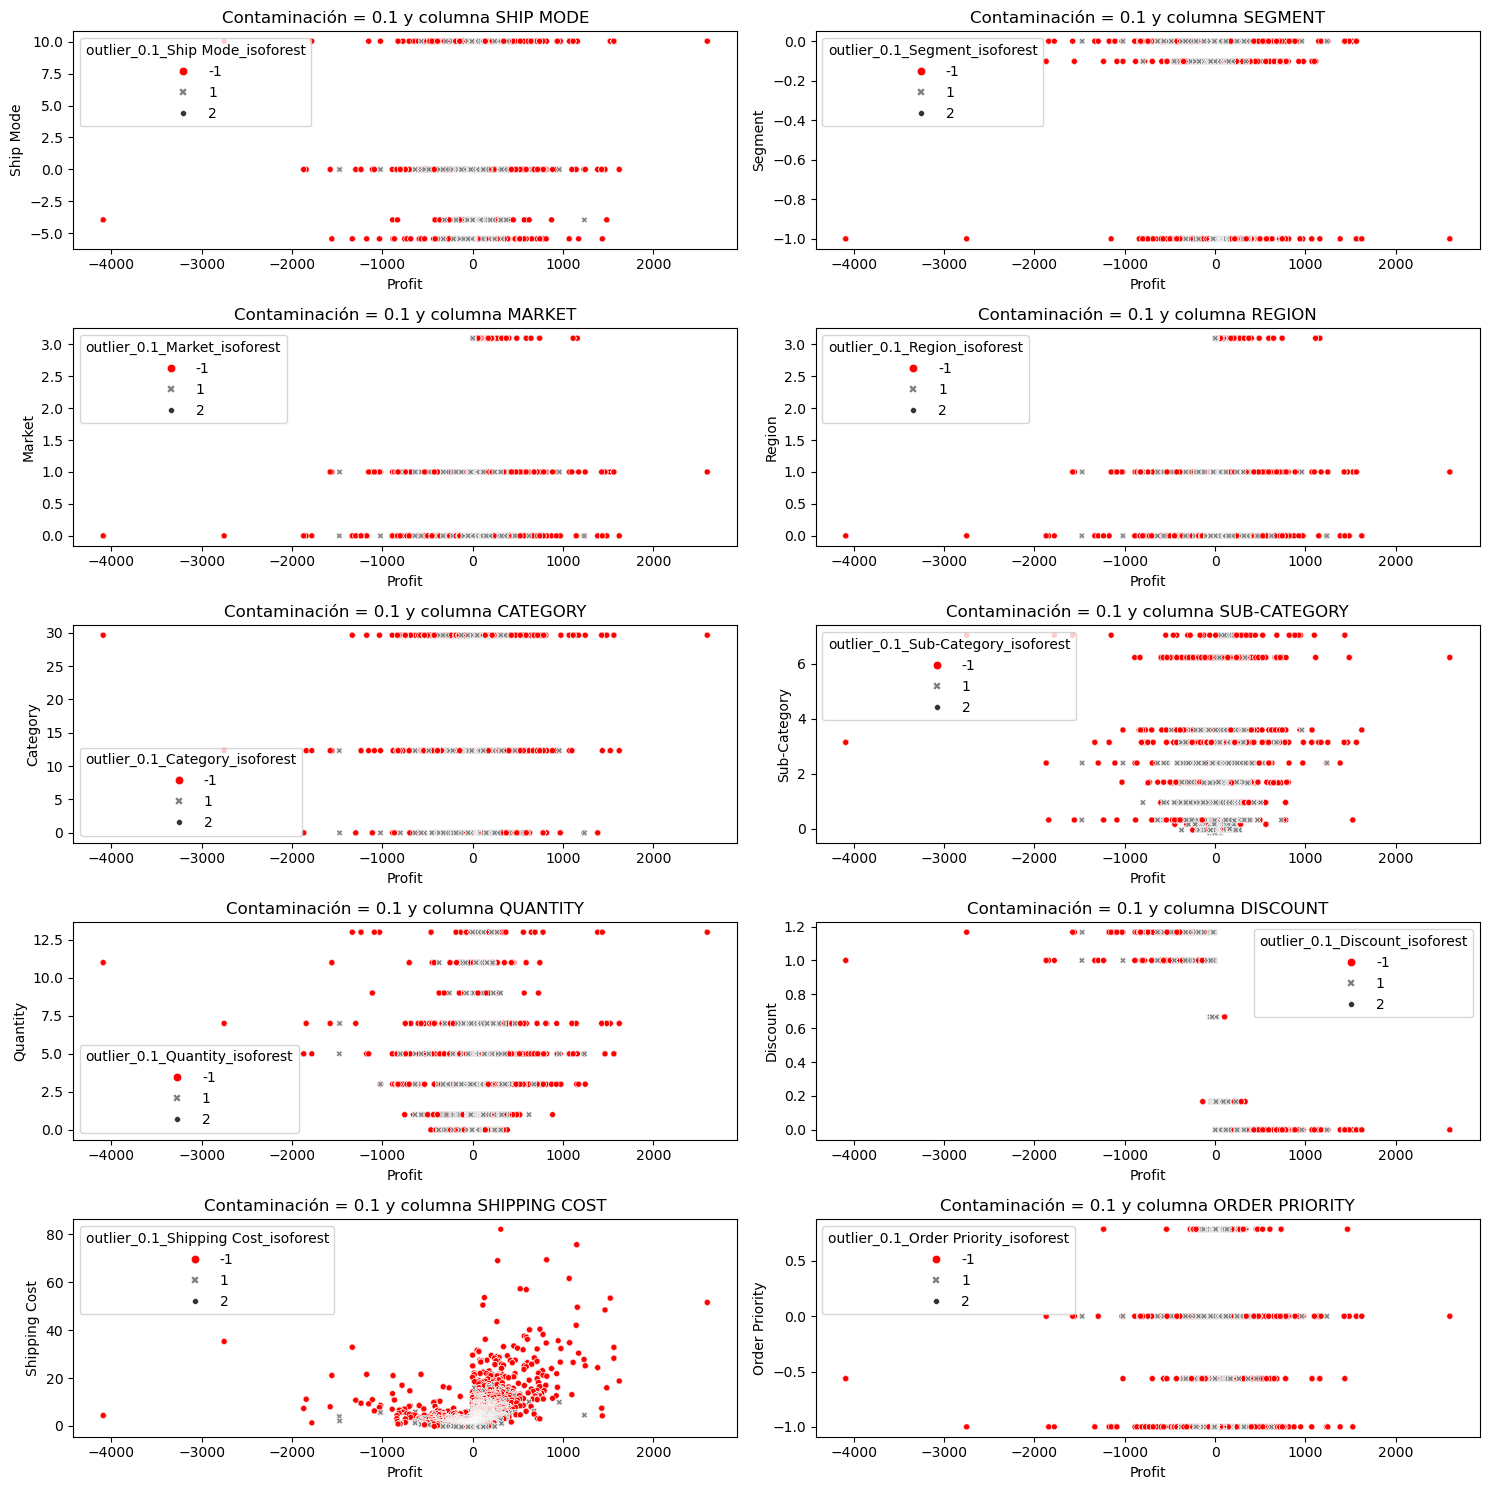

In [11]:
cols_analizar = ['Ship Mode', 'Segment', 'Market', 'Region', 'Category', 'Sub-Category','Quantity', 'Discount', 'Shipping Cost', 'Order Priority']

df_iso = explorar_outliers_if(df[cols_visualizar],df,"Profit",grafica_size=(15,15))

In [12]:
df_iso.sample()

,Ship Mode,Segment,Market,Region,Category,Sub-Category,Quantity,Discount,Shipping Cost,Order Priority,...,outlier_0.1_Ship Mode_isoforest,outlier_0.1_Segment_isoforest,outlier_0.1_Market_isoforest,outlier_0.1_Region_isoforest,outlier_0.1_Category_isoforest,outlier_0.1_Sub-Category_isoforest,outlier_0.1_Quantity_isoforest,outlier_0.1_Discount_isoforest,outlier_0.1_Shipping Cost_isoforest,outlier_0.1_Order Priority_isoforest
3471,0.0,-1.0,1.0,1.0,29.63592,1.671619,3.0,0.0,5.659963,0.0,...,1,1,1,1,1,1,1,1,1,1


# Categorizamos los outliers de ambas pruebas
- Para comparar resultados
### Vamos a gestionar los outliers, los vamos a clasificar como
- "No es Outlier": Todas las columnas son 1
- "Improbable Outlier": El 60% de las columnas son 1
- "Es probable que sea Outlier": El 60% de las columnas son -1
- "Outlier Total": El 100% de las columnas son -1

### ¿Qué voy a hacer?
- Voy a contar cuantos 1 tengo en todas las columnas de outliers para poder categorizarla más adelante

In [13]:
len(df_iso.filter(like="outlier_").columns)

30

In [14]:
# Generamos nueva columna
df_iso["tipo_outliers"] = 0

# Contamos cuantos -1 hay
for columna in df_iso.filter(like="outlier").columns:
    df_iso["tipo_outliers"] += (df_iso[columna] == -1).astype(int)

# Generamos el diccionario de condiciones y textos para reemplazar
condiciones = [
    df_iso["tipo_outliers"] == 0,
    df_iso["tipo_outliers"].between(1, 18,"both"),
    df_iso["tipo_outliers"].between(19, 29,"both"),
    df_iso["tipo_outliers"] == 30
]

textos = [
    "No es Outlier",
    "Improbable Outlier",
    "Probable Outlier",
    "Total Outlier"
]

# Reemplazamos la cuenta por el texto
df_iso["tipo_outliers"] = np.select(condiciones, textos, default="Unknown")

# Nos quitamos las columnas

In [15]:
df_iso.drop(columns=df_iso.filter(like="outlier_").columns,inplace=True)

In [16]:
df_iso["tipo_outliers"].value_counts().reset_index()

,tipo_outliers,count
0,No es Outlier,70263
1,Improbable Outlier,3906
2,Probable Outlier,3116
3,Total Outlier,781


# En este modelo no gestionamos los outliers

In [17]:
df_iso.drop(columns=("tipo_outliers"),inplace=True)

In [18]:
df_iso.to_pickle("../../../datos/02_regresiones/cluster_1/05_datos_outliers_gestionados.pkl")